# Web Scraper using Selenium Web Driver

## Setup

### Install Selenium in Python
From a command prompt, run pip install


In [1]:
pip install selenium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Download ChromeWebdriver and Chrome
Download both to make sure your versions match.

1) Download Chrome WebDriver:
https://googlechromelabs.github.io/chrome-for-testing/#stable  
Select the **Stable** version.  I used windows 64 bit links.

2) Extract the files to a folder on your C: drive  
C:\MyTools\Python\chromedriver-win64  

3) Update your Chrome browser to be sure it is at the same version  
From Chrome select the ... in the right corner  
Help > About Google Chrome  
Shows the version and gives an option to upgrade.






### Add ChromeDriver path to System PATH
1) Go to Settings in Windows  
2) Search for PATH  
3) Select Edit the system environment variables  
4) Click Environment Variables button in the popup dialog  
5) Under System Variables select the PATH variable and click Edit  
6) Click New to add the chromedriver path to the end  
7) Enter the path to the chromedriver folder at the bottom  
8) Save and open a new command prompt  
9) Enter:  
chromedriver.exe --version  
This will confirm if it can find the chromedriver in the PATH variable.




### Add the chrome path to MyEnvVars
Edit the MyEnvVars.py file  
Change the chromedriver_path variable to where you downloaded the chrome driver  

#### Set project environment variables  
Set workspace to the project folder you extracted the project files to
Set downloads to your downloads folder
You can change the topic to search on and number of initial authors to search for

In [ ]:
chromedriver_path = r"C:\MyPath\chromedriver-win64\chromedriver.exe"
workspace = r"D:\UCF\Data Engineering\CNT_5805_Networks\Network Data\Tourism" # top project folder
downloads = r"C:\Users\Craig\Downloads"  # Change to your user download folder
TOPIC = "ALL"  # Topic to search for.  Use all for TOPIC_ALL list
N_AUTHORS = 100      # Number of authors to collect
TOPIC_ALL = "label:tourism OR label:tourism_marketing OR label:tourism_management OR label:tourism_economics OR label:destination_marketing OR label:Hotel_and_Tourism_management OR label:tourist_behavior OR label:tourism_impacts OR label:sustainable_tourism"
GRAPH_FOLDER = "GraphALLTourMgmt5Year"
YEARS_PRIOR = 5  # of years of publications to pull
INCLUDE_NONTOPIC_COAUTH=False  # Add nodes for coauthors not found in original authors list.

## Open the web page in Selenium


In [1]:
import time
import MyEnvVars as MyEnv
from selenium import webdriver
from selenium.webdriver.common.by import By
chromedriver_path = MyEnv.chromedriver_path
service = webdriver.ChromeService(executable_path=chromedriver_path)
browser = webdriver.Chrome(service=service)

#########################################
# Open Google Scholar page
#########################################
print("Opening web page")
browser.get('https://scholar.google.com/citations?view_op=search_authors&hl=en')
time.sleep(2)

Opening web page


# Get Web Page Control info
To get the selenium web scraper to control a web page, you need to get the id of the field on the web page.  

## F12 to view web page info  
Open the web page you want (https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=label%3ATourism&btnG=)  
Press **F12** to view the HTML.  

On the right hand side it will display the HTML for the page.  
Expand the **\<div>** entries under \<body> to get more information about the fields on the page.  




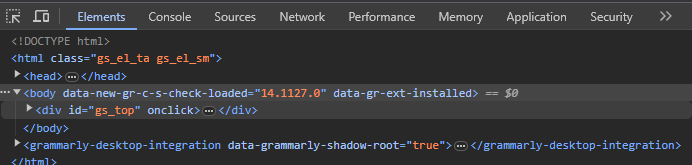

As you move the cursor over the next section to expand, the area on the page that the section draws is highlighted in light blue.  
This helps you determine which elements you need to expand to drill down to the page area you are looking for.  
For example, the image below shows the page header being highlighted for the header element.  


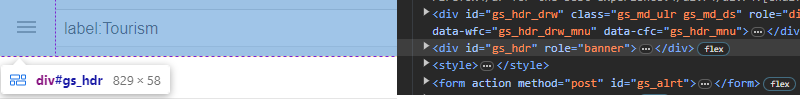

Drilling down under the \<body> elements leads to the list of authors.  
In the HTML code, you can see a list of elements all using the same key.  This indicates the repeated list of authors.  
When you mouse over one of the keys in the list, you see the author highlighted.  
Take note of the id="key" or class="key" variables in the elements.  Selenium needs these key values to find them on the page.  

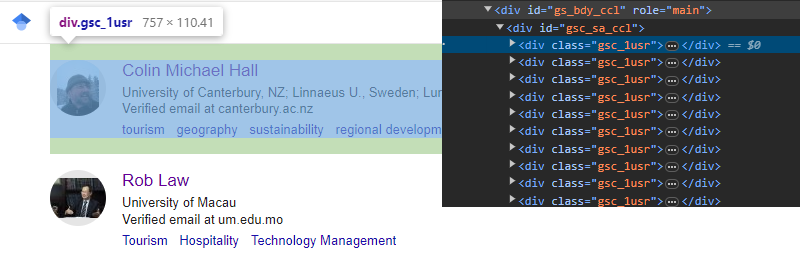

If you expand the \<div> for the author, you will see the controls that list the rest of the author's information.  
Copy the id="key" or class="key" for the fields you want.  
 
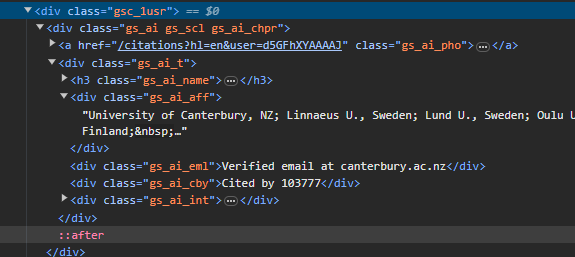

# Selenium Find Element(s)
In the Python code, you will use find_element() to get a control, or find_elements() to get a list of controls.  
Both use the same syntax:  
find_element(By.TYPE, "key")

Use the By.TYPE to indicate what type of element to look for:
- By.ID:  id="key"  best to use because id's are usually unique.
- By.CLASS_NAME: class="key"  most common.  usually as unique as IDs.
- By.TAG_NAME: \<a href="MyLink.html">  Used to get a reference link from an element you already have

See: https://selenium-python.readthedocs.io/locating-elements.html  for help on fiding the elements.  
It has good examples of matching to what the HTML looks like.  

## Text from an element
element.text  
You can get the text using the .text property of an element you retrieved from find_element().  
This will return the display text of the element.

## Click / Submit
buttonElem.click()  formElement.submit()  
Button elements will have a .click() method to call to activate them.
Forms will have a .submit() method to submit the whole page.

## Optional Text
A text element may not always appear on the page.  
In this case, find_element() [singular] will throw an error if the element is not found.  
Instead, use find_elements() [plural] first, then check if the length of the element list is 1 or more before getting the text from the elements.  


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# Get list of authors
authorsList = browser.find_elements(By.CLASS_NAME, "gsc_1usr")
for author in authorsList :
    nameElem = author.find_element(By.CLASS_NAME, "gs_ai_name")
    name = nameElem.text
	# get link to author's page
    linkElem = nameElem.find_element(By.TAG_NAME, "a")  # gets <a href="xxx">
    href = linkElem.get_attribute('href')  # href is an attribute of the <a> element